Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("insurance.csv") # reading the insurance.csv
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Performing Data Cleaning on the Dataframe

In [4]:
df["sex"] = df["sex"].map({"male":1, "female":0}) # map the male and female values that exist in the sex column to 1 and 0 respectively
df["smoker"] = df["smoker"].map({"yes":1, "no":0}) # map the yes and no values that exist in the smoker column to 1 and 0 respectively
df["region"] = df["region"].map({"northeast":0, "northwest":1, "southeast":2, "southwest":3}) # map the regions values to numerical values

In [5]:
# choosing the X and Y from the dataframe
X = df.drop(columns="charges")
Y = df["charges"]

Performing linear regression using sklearn library

In [6]:
model = LinearRegression()
model.fit(X,Y) # finding the linear model

LinearRegression()

In [7]:
w_skl = model.coef_ # extracting the weights and the intercept parts
b_skl = model.intercept_

In [8]:
y_predicted = model.predict(X) # performing the prediction of the X data

In [9]:
r2_score(Y,y_predicted) # computing the COD to compare between algorithms

0.7507372027994937

Implementing the linear regression alogrithm

First: Performing linear regression using normal equations method

In [10]:
x_prime = np.hstack((X.values, np.ones((X.values.shape[0], 1)))) # adding a column of ones to the x array to be used in the algorithm

In [11]:
# implementing the algorithm
XT_X = np.dot(x_prime.T,x_prime) 
w_prime = np.dot(np.dot(np.linalg.inv(XT_X),x_prime.T),Y.values)

In [12]:
r2_score(Y,np.dot(x_prime,w_prime)) # computing the COD to compare between algorithms

0.7507372027994937

First: Performing linear regression using gradient descent method

In [13]:
def gradient_descent(x, y, alpha, t):
    m = x.shape[1] # getting the number of features
    n = len(y) # getting the number of samples
    y = y.reshape(n, 1) # reshaping the y array to prevent shape error in performing dot product
    w = np.zeros((m, 1)) # initalizing the weight array
    b = 0 # initalizing the intercept coefficent
    cost = np.zeros(t) # initalizing the cost array
    
    # performing the math part of the algorithm "from slide"
    for i in range(t):
        diff = (np.dot(x, w) + b) - y 
        gw = np.dot(x.T, diff) / n
        gb = np.sum(diff) / n
        w = w - alpha * gw
        b = b - alpha * gb
        cost[i] = np.sum(diff) ** 2 / (2 * n)
    
    return w, b, cost


In [14]:
# after trail and error, i figured out that alpha =  10^(-3.25) is the best value to get good coefficient of determination (r2_score) and by increasing the number of iterations the r2_score become better

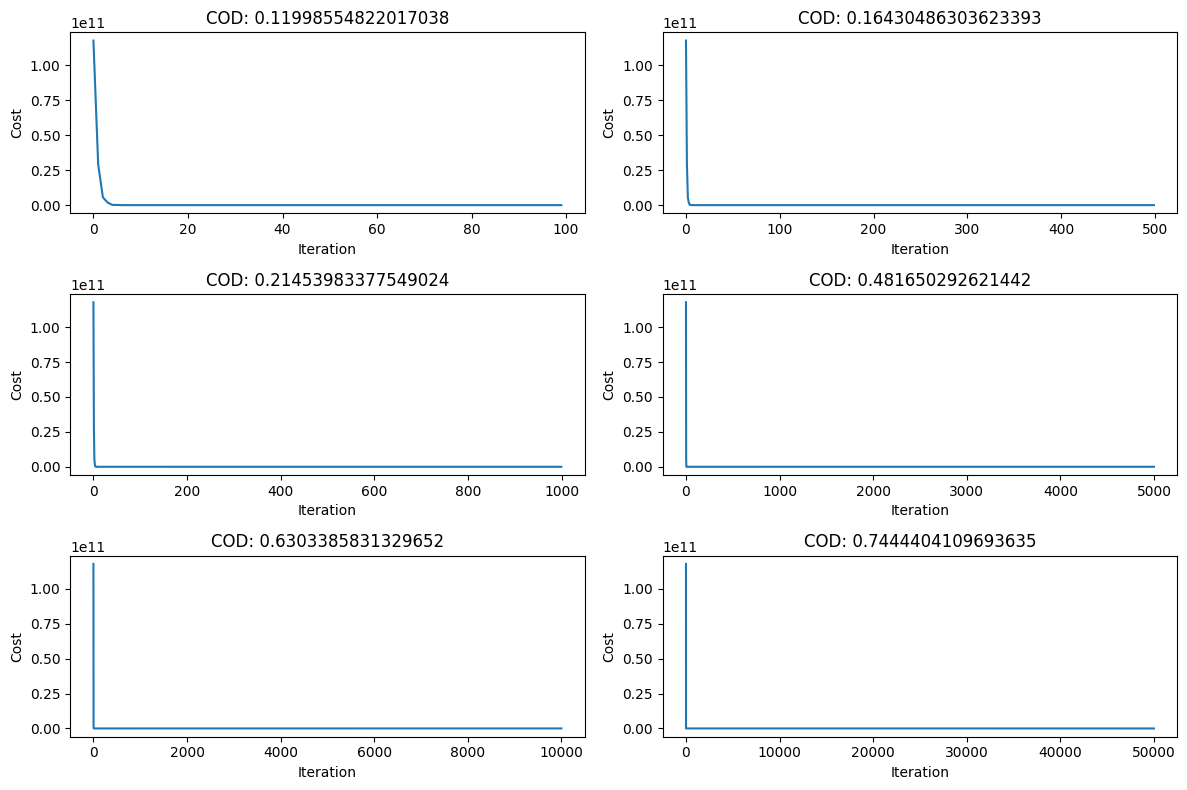

In [16]:
# Define the range of iterations
iterations = [100, 500, 1000, 5000, 10000, 50000]

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Iterate over the iterations and plot the results
for i, t in enumerate(iterations):
    # Run the gradient_descent function
    w, b, cost = gradient_descent(X.values, np.array(Y.values), 10**(-3.25), t)
    
    # Determine the subplot location
    row = i // 2
    col = i % 2
    
    # Plot the cost values
    axs[row, col].plot(range(t), cost)
    axs[row, col].set_xlabel('Iteration')
    axs[row, col].set_ylabel('Cost')
    axs[row, col].set_title(f'COD: {r2_score(Y.values,np.dot(X,w)+b)}' )
    
# Adjust the spacing
plt.tight_layout()
